# Import the modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from  matplotlib.ticker import FuncFormatter

warnings.simplefilter(action="ignore", category=FutureWarning)

#import os
#print(os.listdir("../Kaggle-Olympic-History/"))

# 1. Import data

Datasets are downloaded from [120 years of Olympic history: athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results).

In [2]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

# Merge the two datasets

In [3]:
#df = pd.merge(data, regions, on='NOC', how='left')

# 2. Clean the dataset

In [4]:
df = data

In [5]:
df.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [6]:
df = df.dropna(how = 'any', subset = ['Age', 'Height', 'Weight'])

In [7]:
df.isnull().any()

ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


# 3. Descriptive statistics

In [9]:
df.iloc[:,1:].describe(include = 'all')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,206165,206165,206165.000000,206165.000000,206165.000000,206165,206165,206165,206165.000000,206165,206165,206165,206165,30181
unique,98546,2,NaN,NaN,NaN,660,226,51,NaN,2,42,56,590,3
top,Heikki Ilmari Savolainen,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold
freq,39,139454,NaN,NaN,NaN,13714,14214,13682,NaN,166706,13804,32374,3825,10167
mean,NaN,NaN,25.055509,175.371950,70.688337,NaN,NaN,NaN,1989.674678,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.483096,10.546088,14.340338,NaN,NaN,NaN,20.130865,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,11.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1976.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN


# 4. Visual analysis

## 1. Distribution of the age of participants

In [10]:
#pd.set_option("display.max_rows", None)
df['Age'].value_counts()

23.0    17743
24.0    17536
22.0    16825
25.0    16298
21.0    15361
        ...  
69.0        2
70.0        2
64.0        2
71.0        1
68.0        1
Name: Age, Length: 61, dtype: int64

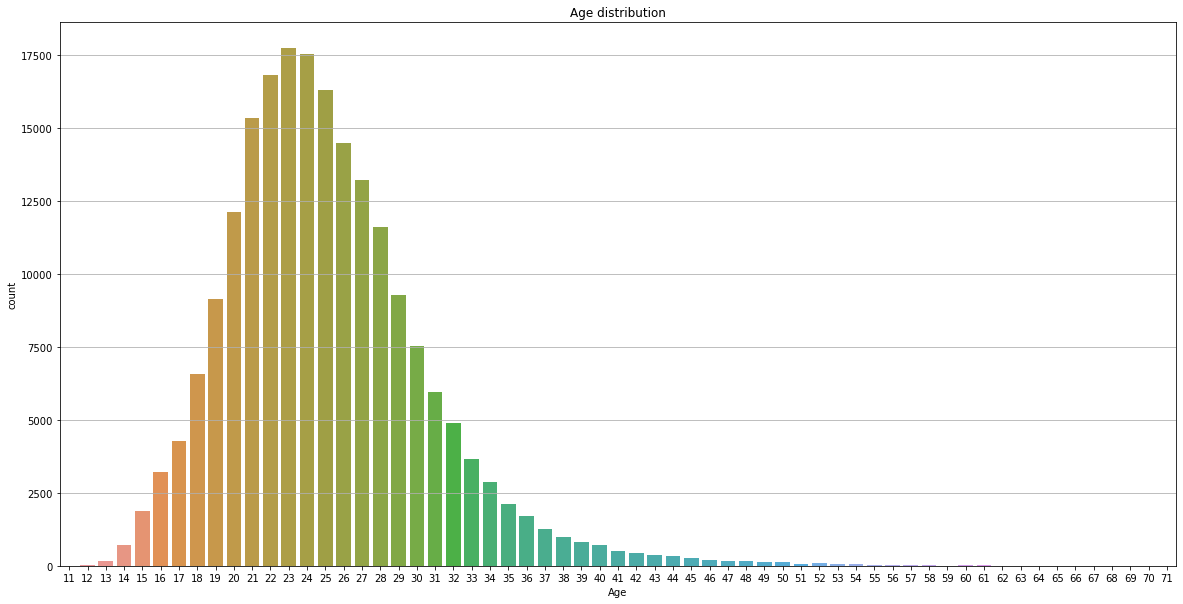

In [11]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
sns.countplot(data = df,
              x = 'Age')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) + 11))

## 2. Medal count and distribution of medals by age of participants

In [12]:
medals = df.dropna(how = 'any', subset = ['Medal'])

In [13]:
medals['Medal'].value_counts()

Gold      10167
Bronze    10148
Silver     9866
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Medal count')

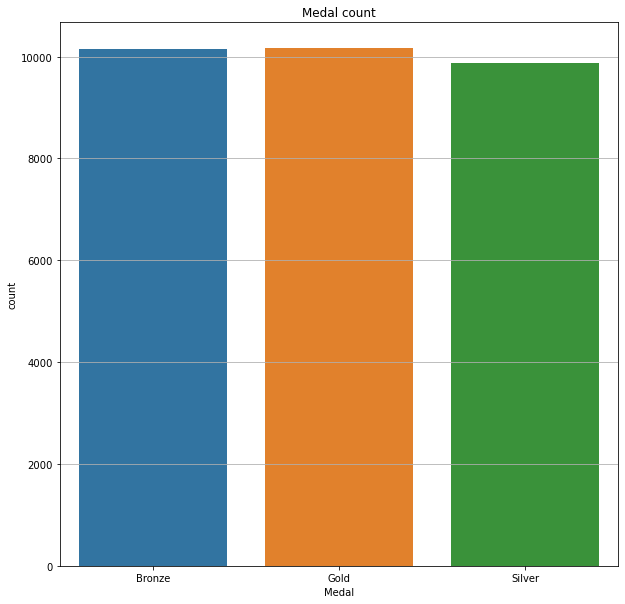

In [14]:
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.grid(True)
sns.countplot(data = medals,
              x = 'Medal')
plt.title('Medal count')

In [15]:
medals['Age'].value_counts()

23.0    2742
24.0    2649
25.0    2558
22.0    2549
26.0    2378
27.0    2213
21.0    2140
28.0    1948
29.0    1553
20.0    1550
30.0    1256
19.0    1025
31.0     950
32.0     760
18.0     644
33.0     558
34.0     453
17.0     399
35.0     295
16.0     284
36.0     241
37.0     160
15.0     155
38.0     122
39.0      94
40.0      90
41.0      58
42.0      55
14.0      53
46.0      41
44.0      37
43.0      33
45.0      26
52.0      18
49.0      15
47.0      15
48.0      14
13.0      10
50.0       9
54.0       5
56.0       5
51.0       5
58.0       3
55.0       3
60.0       3
61.0       2
53.0       2
59.0       1
66.0       1
57.0       1
Name: Age, dtype: int64

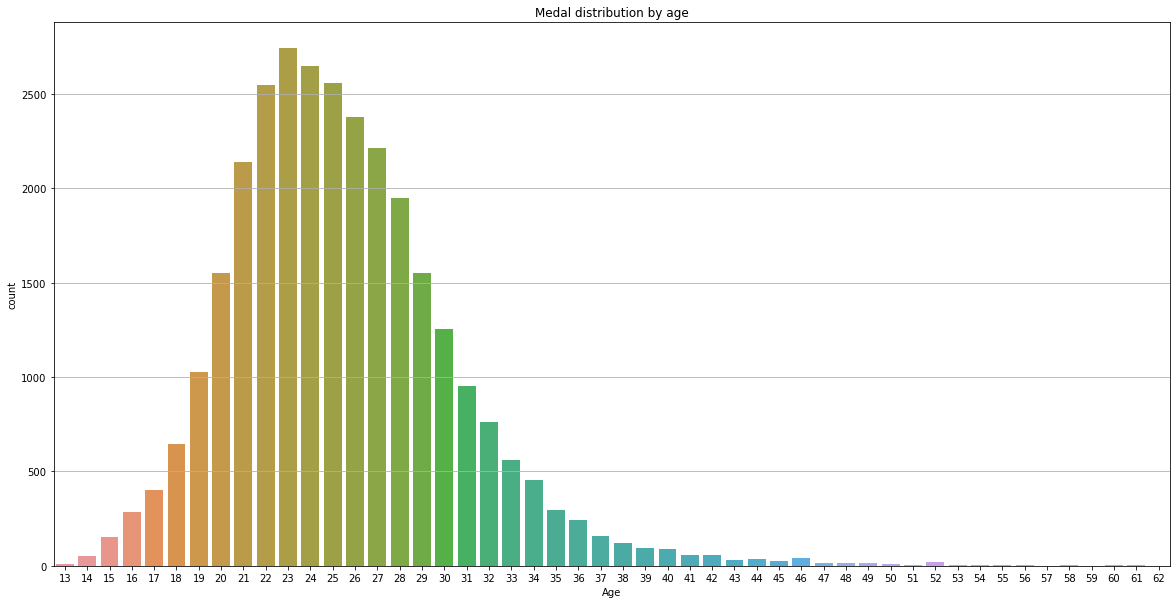

In [16]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.grid(True)
plt.title('Medal distribution by age')
sns.countplot(data = medals,
              x = 'Age')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x) + 13))

## 3. Distribution of medals by sports in seasons

In [17]:
medals['Season'].value_counts()

Summer    25341
Winter     4840
Name: Season, dtype: int64

In [18]:
medals_summer = medals[(medals['Season'] == 'Summer')]
medals_winter = medals[(medals['Season'] == 'Winter')]

Text(0.5, 1.0, 'Medal distribution by sports in summer')

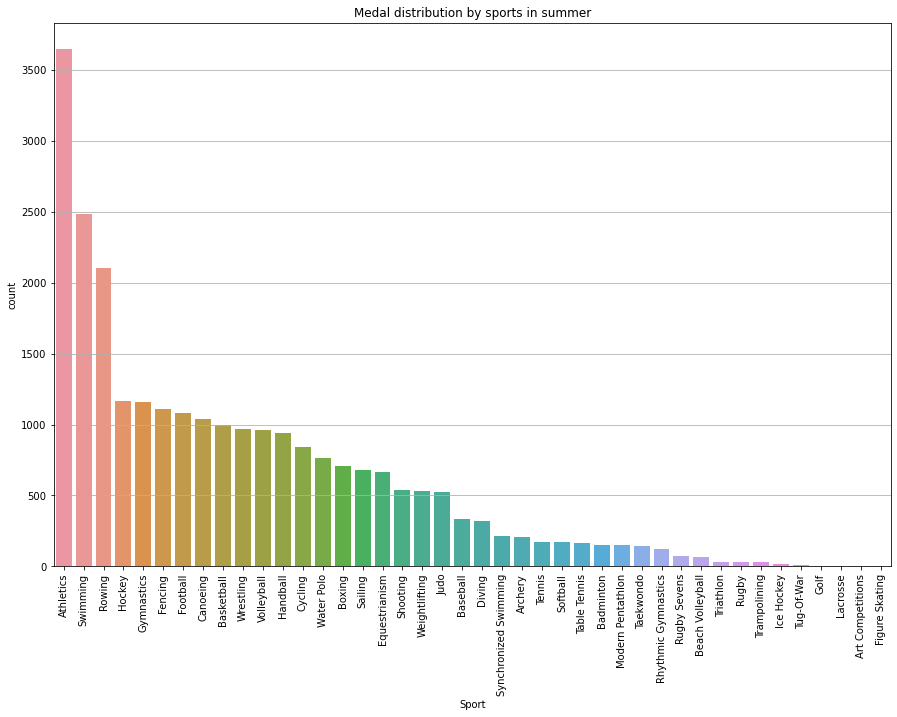

In [19]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.grid(True)
plt.xticks(rotation=90)
sns.countplot(data = medals_summer,
              x = 'Sport',
              order = medals_summer['Sport'].value_counts().index)
plt.title('Medal distribution by sports in summer')

Text(0.5, 1.0, 'Medal distribution by sports in winter')

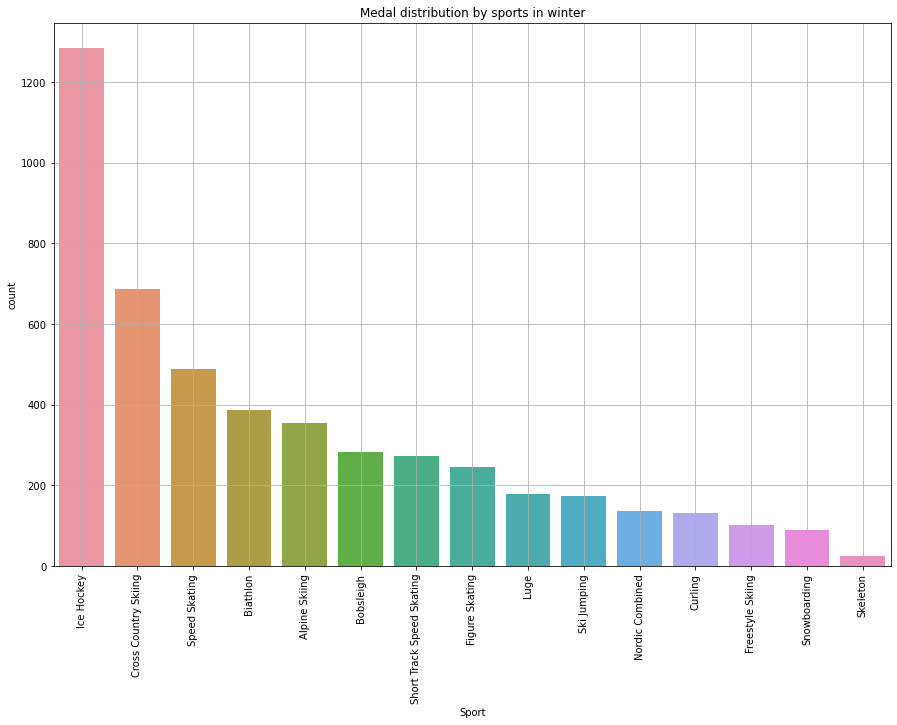

In [20]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = medals_winter,
              x = 'Sport',
              order = medals_winter['Sport'].value_counts().index)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Medal distribution by sports in winter')

## 3. Distribution of athletes participating by year

In [21]:
df['Year'].value_counts()

2000    13682
1988    13636
2016    13443
2008    13402
2004    13399
1992    13109
2012    12524
1996    11838
1972    11482
1984    10868
1968    10203
1976     9567
1964     8711
1980     8217
1960     8038
2014     4673
2010     4378
2006     4365
2002     4060
1998     3518
1994     2971
1956     2595
1952     2058
1948     1016
1936      896
1928      666
1924      582
1912      551
1932      492
1920      428
1908      366
1906      201
1904      119
1900       71
1896       40
Name: Year, dtype: int64

In [22]:
summer = df[(df['Season'] == 'Summer')]
winter = df[(df['Season'] == 'Winter')]

Text(0.5, 1.0, 'Distribution of athletes participating by year in summer')

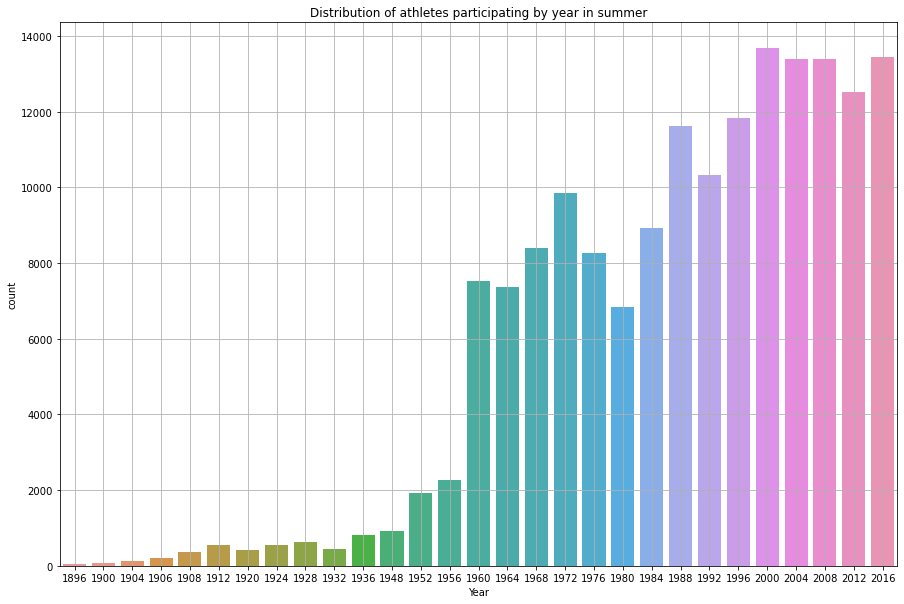

In [23]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = summer,
              x = 'Year')
plt.grid(True)
#plt.xticks(rotation = 90)
plt.title('Distribution of athletes participating by year in summer')

Text(0.5, 1.0, 'Distribution of athletes participating by year in winter')

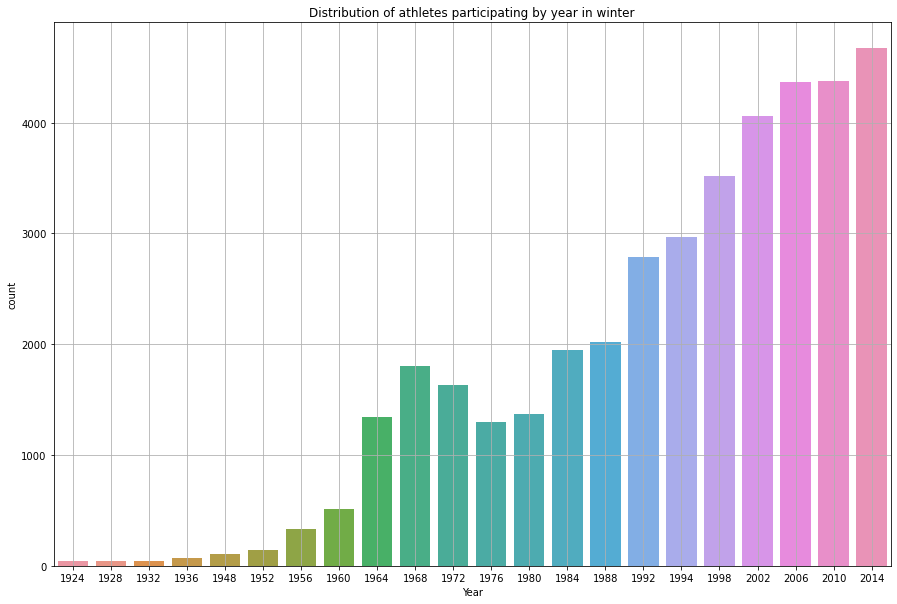

In [24]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = winter,
              x = 'Year')
plt.grid(True)
#plt.xticks(rotation = 90)
plt.title('Distribution of athletes participating by year in winter')

## 5. Distribution of athletes by team (top 30)

In [25]:
top_30_teams = df['Team'].value_counts().head(30).index.tolist()

In [26]:
df_teams = df.loc[df['Team'].isin(top_30_teams)]

In [27]:
df_teams['Team'].value_counts()

United States     13714
France             7807
Canada             7668
Great Britain      7499
Italy              7433
Japan              7339
Germany            6997
Australia          6509
Poland             5667
Sweden             5251
Soviet Union       4757
China              4712
Hungary            4665
Russia             4614
Finland            4365
Spain              4281
Switzerland        3918
South Korea        3751
Netherlands        3684
Romania            3421
West Germany       3159
Brazil             3129
Bulgaria           3015
Norway             3014
Austria            2984
Czechoslovakia     2685
East Germany       2511
Ukraine            2380
Mexico             2291
Cuba               2201
Name: Team, dtype: int64

Text(0.5, 1.0, 'Distribution of athletes participating by year in winter')

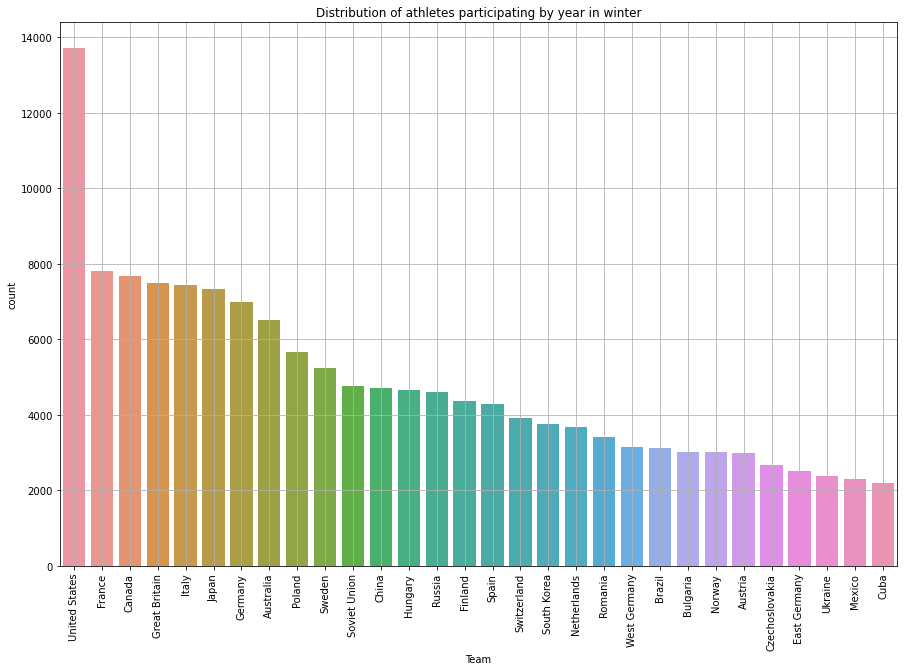

In [28]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = df_teams,
              x = 'Team',
              order = df_teams['Team'].value_counts().index)
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Distribution of athletes participating by year in winter')

# 5. Hypotheses

## 1. The bigger the height the bigger the chance of obtaining the medal 

In [29]:
basketball = df[df['Sport'] == "Basketball"]


basketball['Medal'] = basketball['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
basketball['Medal'].fillna('No', inplace = True)

/var/folders/_1/qd1mt3zn08vcxbqywqq_sf7w0000gn/T/ipykernel_84823/315894922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basketball['Medal'] = basketball['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [30]:
basketball['Medal'].value_counts()

No     2668
Yes    1000
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Kernel density estimation of medalists and non-medalists')

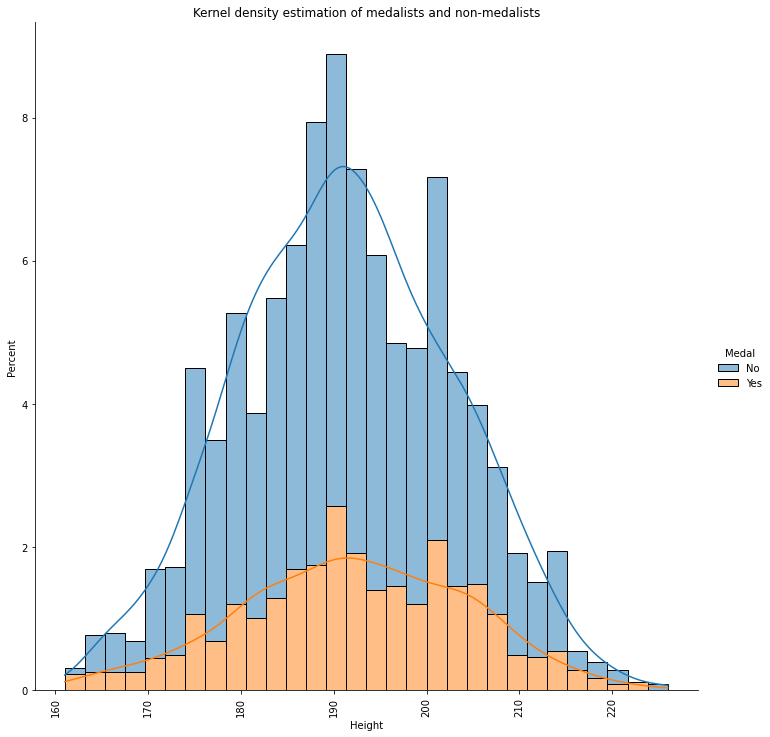

In [52]:
sns.displot(data = basketball,
            x = 'Height',
            height=10,
            hue="Medal",
            kde=True,
            stat='percent',
            multiple="stack")
#plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Kernel density estimation of medalists and non-medalists')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

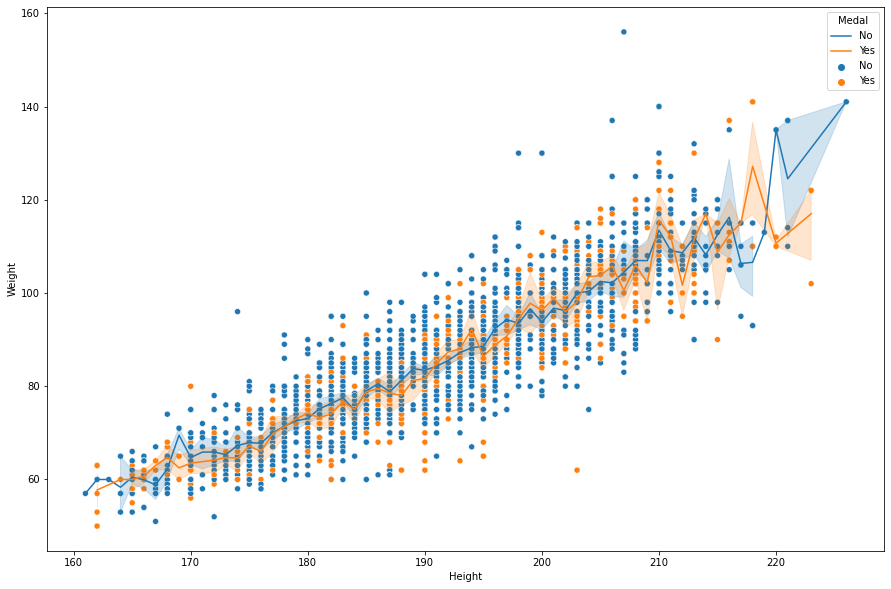

In [32]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.scatterplot(data = basketball,
                x = 'Height',
                y = 'Weight',
                hue = 'Medal')
sns.lineplot(data = basketball,
             x = 'Height',
             y = 'Weight',
            hue = 'Medal')

It is seen that kde of 'No' medal exactly like 'Yes' medal on the left of the mean point in the deviation. \
Therefore there is the same chance of getting the medal the higher you are. The difference in height does not correlate with getting the medal whatsoever. \
Result: hypothesis is wrong.

## 2. There are more participants in summer olympics than in winter olympics

Text(0.5, 1.0, 'Number of participants in summer and winter')

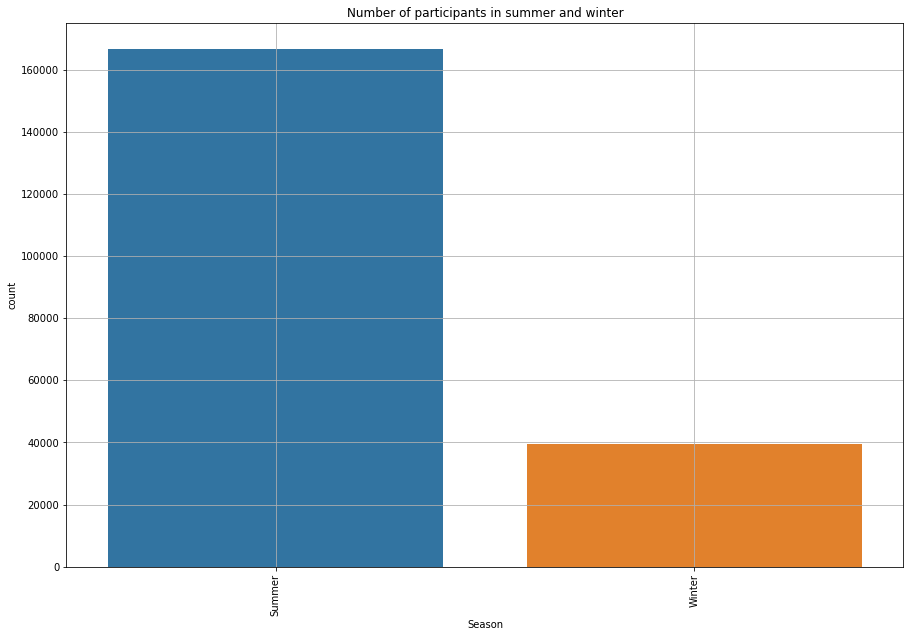

In [33]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
sns.countplot(data = df,
            x = 'Season')
plt.grid(True)
plt.xticks(rotation = 90)
plt.title('Number of participants in summer and winter')

Text(0.5, 1.0, 'Number of participants in summer and winter')

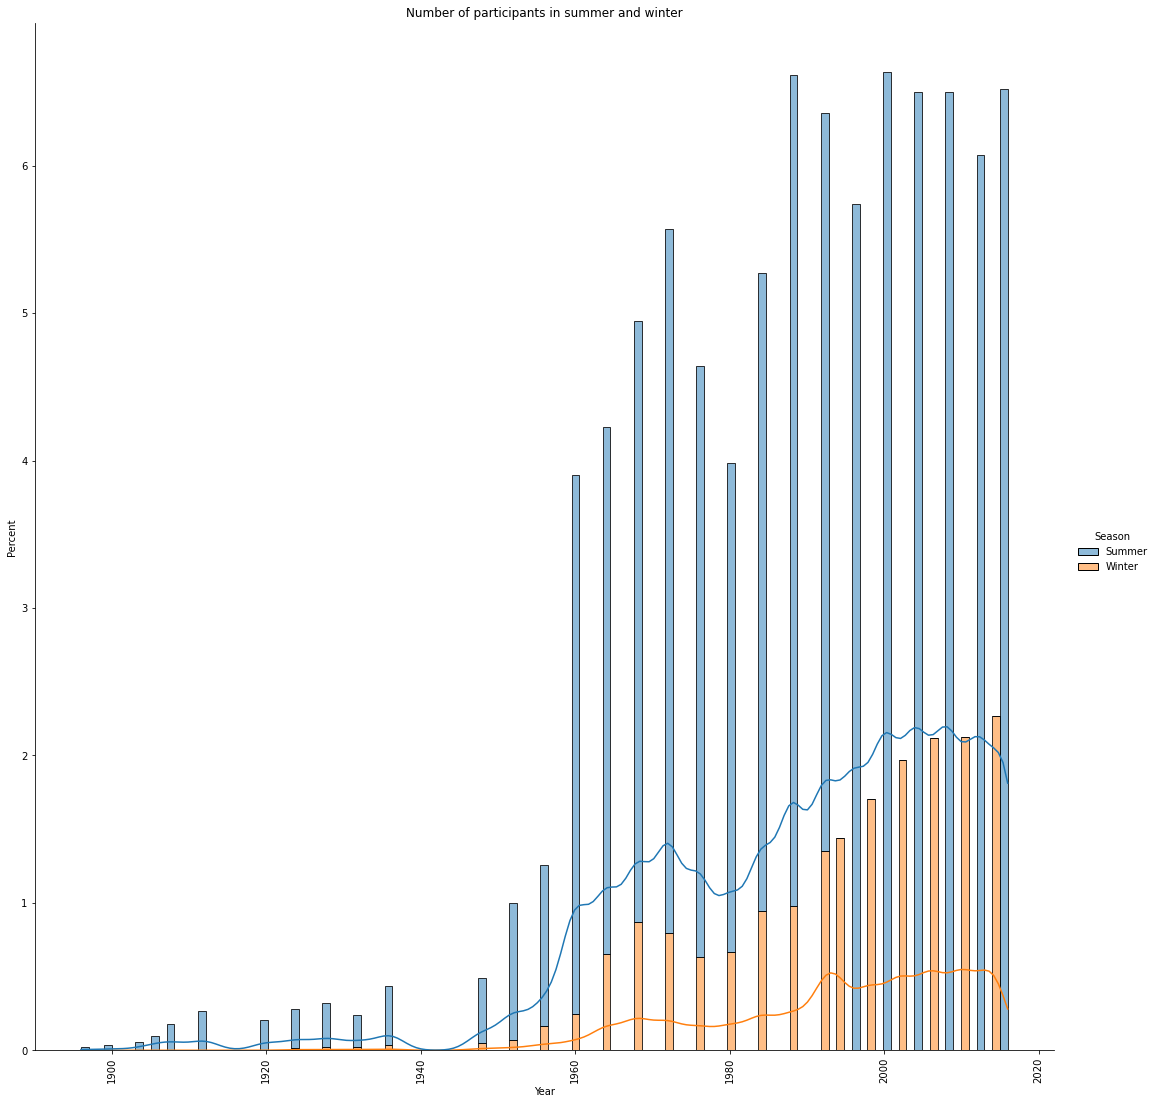

In [34]:
sns.displot(data = df,
            x = 'Year',
            hue='Season',
            height=15,
            kde=True,
            stat='percent',
            multiple="stack")
plt.xticks(rotation = 90)
plt.title('Number of participants in summer and winter')

It can clearly be seen that even before splitting the Olympics into summer and winter games to different years, there were always more participants in summer games. \
Result: hypothesis is correct

## 3. Males and females perform the same on the Olympic games on average

In [43]:
df_ = df.copy()
df_['Medal'] = df_['Medal'].replace(['Gold', 'Silver', 'Bronze'], 'Yes')
df_['Medal'].fillna('No', inplace = True)

In [44]:
df_['Medal'].value_counts()

No     175984
Yes     30181
Name: Medal, dtype: int64

In [72]:
male = df_[df_['Sex'] == 'M']
female = df_[df_['Sex'] == 'F']

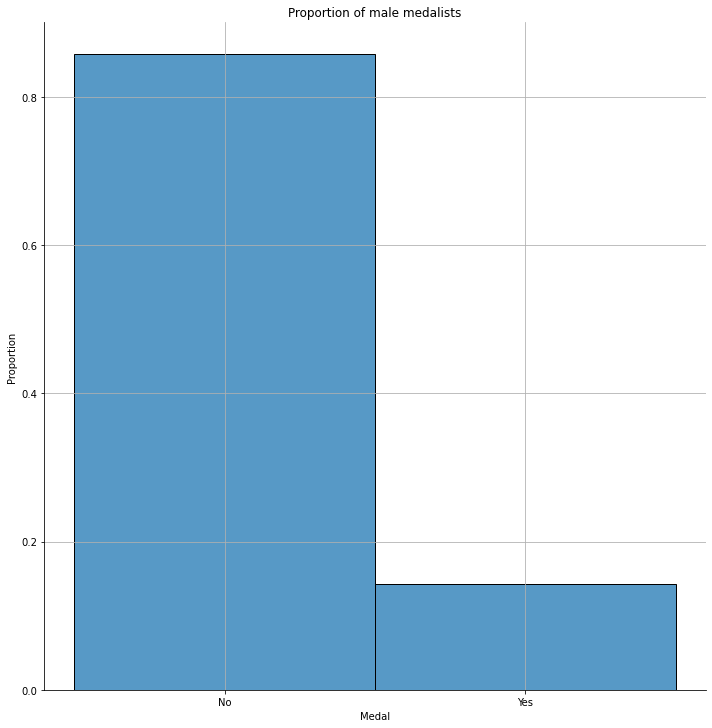

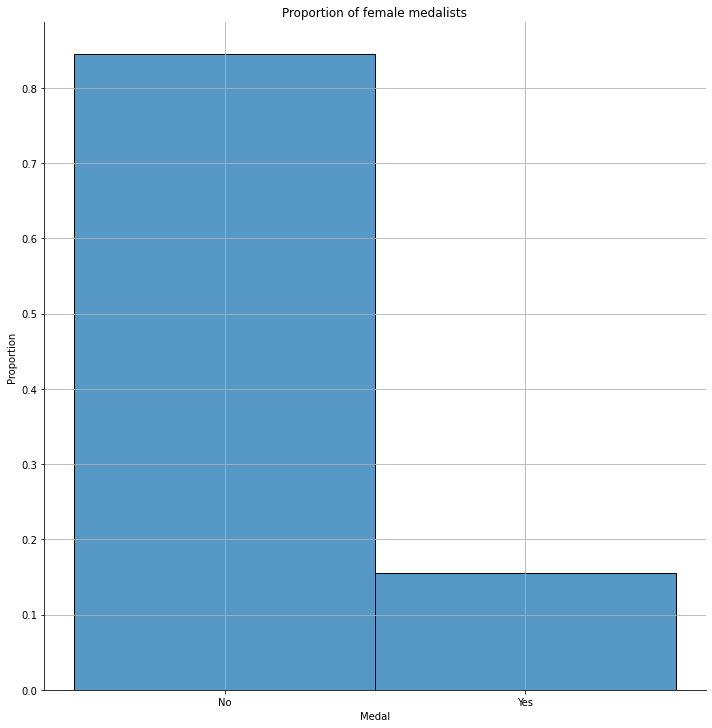

In [92]:
sns.displot(data = male,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Proportion of male medalists')

sns.displot(data = female,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Proportion of female medalists')

plt.show()

In [112]:
print('Male medalist percentage:', len(male[male['Medal'] == 'Yes'].value_counts().index)/len(male)*100, '%')
print('Female medalist percentage:', len(female[female['Medal'] == 'Yes'].value_counts().index)/len(female)*100, '%')

Male medalist percentage: 14.220459793193454 %
Female medalist percentage: 15.514682735980573 %


In [119]:
male_ = df[df['Sex'] == 'M']
female_ = df[df['Sex'] == 'F']

In [120]:
male_['Medal'].fillna('No', inplace = True)
female_['Medal'].fillna('No', inplace = True)

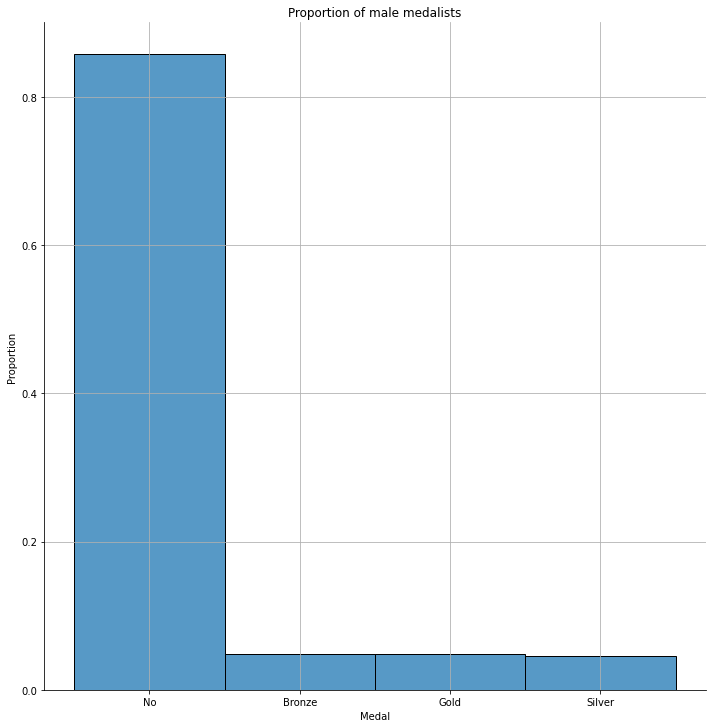

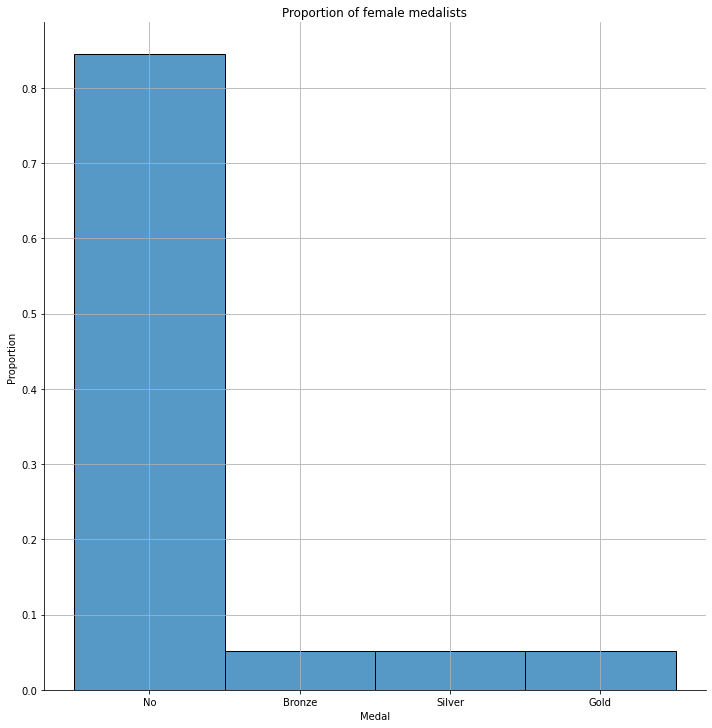

In [121]:
sns.displot(data = male_,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Proportion of male medalists')

sns.displot(data = female_,
            x = 'Medal',
            height=10,
            stat='proportion')
plt.grid(True)
plt.title('Proportion of female medalists')

plt.show()

In [129]:
m_g = len(male_[male_['Medal'] == 'Gold'].value_counts().index)/len(male_)*100
m_s = len(male_[male_['Medal'] == 'Silver'].value_counts().index)/len(male_)*100
m_b = len(male_[male_['Medal'] == 'Bronze'].value_counts().index)/len(male_)*100
f_g = len(female_[female_['Medal'] == 'Gold'].value_counts().index)/len(female_)*100
f_s = len(female_[female_['Medal'] == 'Silver'].value_counts().index)/len(female_)*100
f_b = len(female_[female_['Medal'] == 'Bronze'].value_counts().index)/len(female_)*100

print('Male gold medalist percentage:', m_g, '%')
print('Male silver medalist percentage:', m_s, '%')
print('Male bronze medalist percentage:', m_b, '%\n')

print('Female gold medalist percentage:', f_g, '%')
print('Female silver medalist percentage:', f_s, '%')
print('Female bronze medalist percentage:', f_b, '%\n')

print('Total percentage of male medalists', m_g + m_s + m_b, '%')
print('Total percentage of female medalists', f_g + f_s + f_b, '%')
print('Difference in percentage between male and female medalists:', (f_g + f_s + f_b)-(m_g + m_s + m_b), '%' )

Male gold medalist percentage: 4.825964117199937 %
Male silver medalist percentage: 4.609405251911024 %
Male bronze medalist percentage: 4.785090424082493 %

Female gold medalist percentage: 5.152073870875867 %
Female silver medalist percentage: 5.1535728740387645 %
Female bronze medalist percentage: 5.209035991065941 %

Total percentage of male medalists 14.220459793193456 %
Total percentage of female medalists 15.514682735980575 %
Difference in percentage between male and female medalists: 1.294222942787119 %


Females perform slightly better than males, difference being 1,3%. \
Result: hypothesis is wrong. \